<a href="https://colab.research.google.com/github/Balajilp/Statistics/blob/main/Statistical_Thinking_Null_Regression_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Integrating google colab with drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# Filtering the Warning
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)

In [4]:
# importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
# loading the data
churn_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/churn_data_st.csv')

# printing the top 5 records
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [6]:
# taking the copy of the dataset
df = churn_df.copy()

In [7]:
# getting the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   tenure            7043 non-null   int64  
 4   ServiceCount      7043 non-null   int64  
 5   Contract          7043 non-null   object 
 6   PaperlessBilling  7043 non-null   object 
 7   MonthlyCharges    7043 non-null   float64
 8   TotalCharges      7016 non-null   float64
 9   Churn             7043 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [8]:
# Checking the missing values
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
tenure               0
ServiceCount         0
Contract             0
PaperlessBilling     0
MonthlyCharges       0
TotalCharges        27
Churn                0
dtype: int64

In [9]:
# printing the shape of the dataframe
df.shape

(7043, 10)

In [10]:
# capturing all the missing values
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No


In [11]:
# in tenure column we see lot of 0 so let's capture were the 0 
df[df.tenure==0]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No
3331,7644-OMVMY,Male,0,0,7,Two year,No,19.85,NaN,No
3826,3213-VVOLG,Male,0,0,8,Two year,No,25.35,NaN,No
4380,2520-SGTTA,Female,0,0,7,Two year,No,20.00,NaN,No
5218,2923-ARZLG,Male,0,0,7,One year,Yes,19.70,NaN,No
6670,4075-WKNIU,Female,0,0,7,Two year,No,73.35,NaN,No


In [12]:
df['TotalCharges'].describe()

count    7016.000000
mean     2282.589168
std      2265.506114
min        18.800000
25%       401.925000
50%      1397.100000
75%      3792.325000
max      8684.800000
Name: TotalCharges, dtype: float64

In [13]:
df[df['Churn']=='No'].describe()

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000,5174.000000,5147.000000
mean,0.128721,37.569965,5.811751,61.265124,2555.220264
std,0.334923,24.113777,1.890418,31.092648,2328.034938
min,0.000000,0.000000,1.000000,18.250000,18.800000
25%,0.000000,15.000000,4.000000,25.100000,579.200000
50%,0.000000,38.000000,6.000000,64.425000,1685.900000
75%,0.000000,61.000000,7.000000,88.400000,4263.725000
max,1.000000,72.000000,9.000000,118.750000,8672.450000


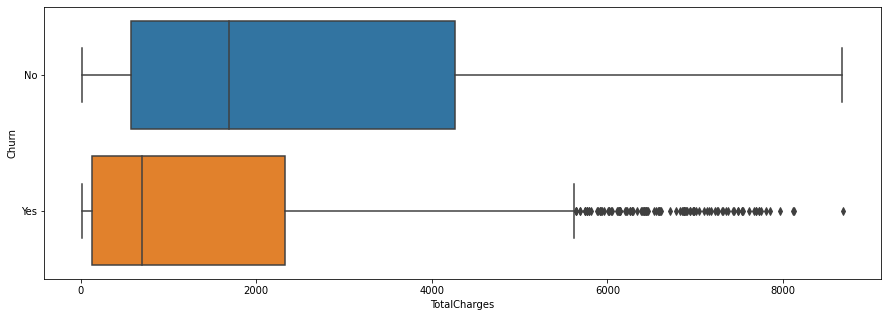

In [15]:
# using boxplot for TotalChargescolumns
plt.figure(figsize=(15, 5))
sns.boxplot(x='TotalCharges', y='Churn', data = df)

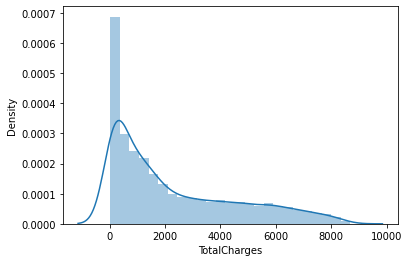

In [16]:
# generating of histogram
sns.distplot(df['TotalCharges'], hist=True)

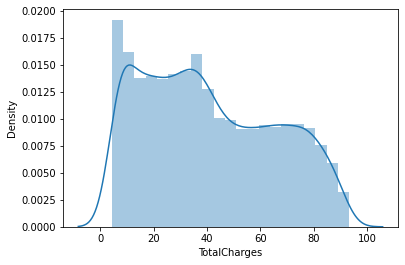

In [17]:
sns.distplot(df['TotalCharges'].apply(np.sqrt), hist=True)

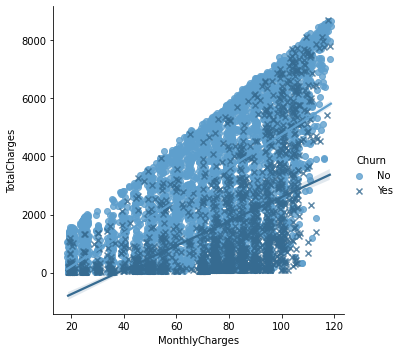

In [19]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=df, fit_reg=True, hue='Churn', markers=['o', 'x'], palette='Blues_d')
# here data is not fitting properly

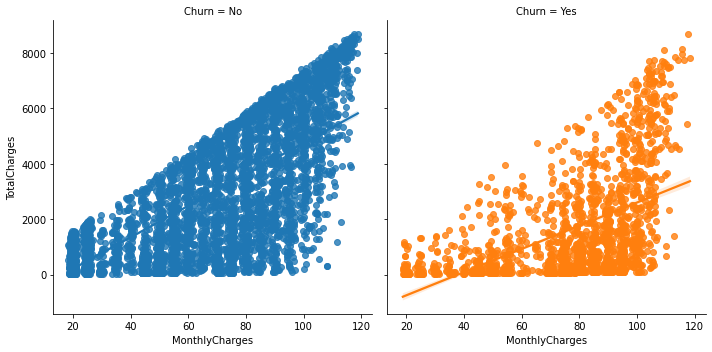

In [20]:
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=df, fit_reg=True, col='Churn', hue='Churn')

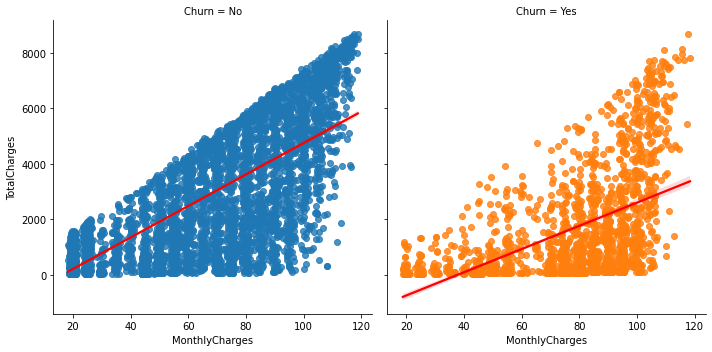

In [21]:
# here we are providing line color to red
sns.lmplot(x='MonthlyCharges', y='TotalCharges', data=df, fit_reg=True, col='Churn', hue='Churn', line_kws={'color':'red'})

In [22]:
# Checking the correlation of total charges and monthly charges
df[['TotalCharges', 'MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.000000,0.650964
MonthlyCharges,0.650964,1.000000


In [23]:
# Selecting the churn is no and taking the correlation of the 2 columns
df[df['Churn']=='No'][['TotalCharges', 'MonthlyCharges']].corr()

,TotalCharges,MonthlyCharges
TotalCharges,1.00000,0.75739
MonthlyCharges,0.75739,1.00000


In [25]:
# Creating a new datafrdame with churn == no and total charges is not null
churn_no_df = df[(df.Churn=='No') & (df.TotalCharges.isna()==False)]
churn_no_df.shape[0]

5147

In [26]:
churn_no_df.isna().any()

customerID          False
gender              False
SeniorCitizen       False
tenure              False
ServiceCount        False
Contract            False
PaperlessBilling    False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [30]:
# Fitting the linear regression which is available inside the scipy module
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df.MonthlyCharges, churn_no_df.TotalCharges)

In [31]:
print('Slope : ', slope)
print('Intercept : ', intercept)
print('r_value : ', r_value)
print('p_value : ', p_value)
print('std_err : ', std_err)
print('r2_value : ', r_value**2)

Slope :  56.73637552696062
Intercept :  -922.8160085118097
r_value :  0.7573902887184033
p_value :  0.0
std_err :  0.6819261867835148
r2_value :  0.5736400494449463


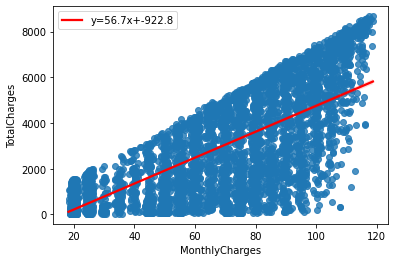

In [33]:
ax = sns.regplot(x='MonthlyCharges', y='TotalCharges', data=churn_no_df, line_kws={'color':"red", 'label':'y={0:.1f}x+{1:.1f}'.format(slope, intercept)})
ax.legend(loc='best')

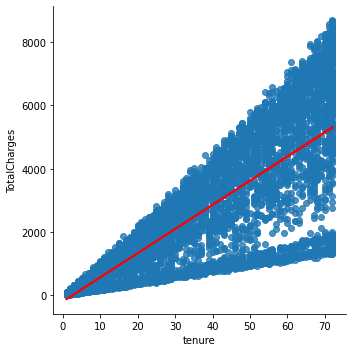

In [35]:
sns.lmplot(x='tenure', y='TotalCharges', data=df, fit_reg=True, line_kws={'color':"red"})

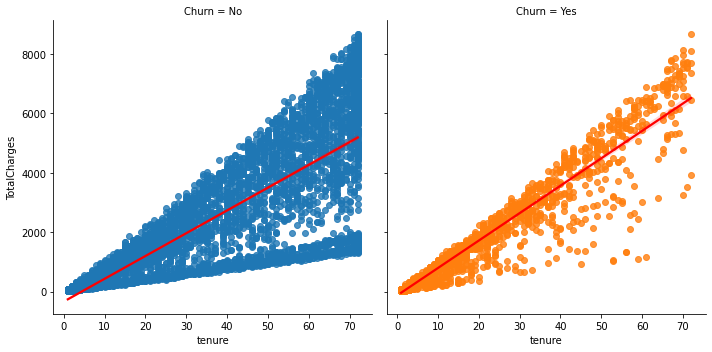

In [37]:
# splitting the yes and no seperately
sns.lmplot(x='tenure', y='TotalCharges', data=df, fit_reg=True, col='Churn', hue='Churn', line_kws={'color':"red"})

In [38]:
# check the correlation
df[['tenure', 'TotalCharges']].corr()

,tenure,TotalCharges
tenure,1.000000,0.826066
TotalCharges,0.826066,1.000000


In [39]:
# Checking the correlation for no only
df[df['Churn']=='No'][['tenure','TotalCharges']].corr()

,tenure,TotalCharges
tenure,1.000000,0.793288
TotalCharges,0.793288,1.000000


In [40]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df.tenure, churn_no_df.TotalCharges)

In [41]:
print('Slope : ', slope)
print('Intercept : ', intercept)
print('r_value : ', r_value)
print('p_value : ', p_value)
print('std_err : ', std_err)
print('r2_value : ', r_value**2)

Slope :  76.74259761920021
Intercept :  -334.08560506046933
r_value :  0.793287728023258
p_value :  0.0
std_err :  0.8211475250987232
r2_value :  0.6293054194323026


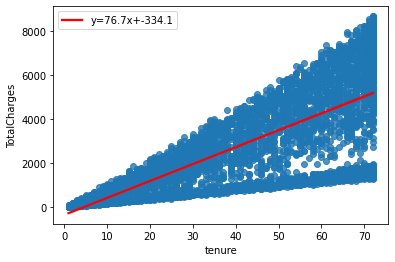

In [42]:
ax = sns.regplot(x='tenure', y='TotalCharges', data=churn_no_df, line_kws={'color':"red", 'label':'y={0:.1f}x+{1:.1f}'.format(slope, intercept)})
ax.legend(loc='best')

In [43]:
# WE TRY TO USE BOTH COLUMNS TO PREDICT THE TOTALCHARGES
churn_no_df['tenure_charges'] = churn_no_df['tenure'] * churn_no_df['MonthlyCharges']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [44]:
churn_no_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,tenure_charges
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No,29.85
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No,1936.30
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No,1903.50
6,1452-KIOVK,Male,0,22,5,Month-to-month,Yes,89.10,1949.40,No,1960.20
7,6713-OKOMC,Female,0,10,2,Month-to-month,No,29.75,301.90,No,297.50


In [46]:
churn_no_df[churn_no_df['Churn']=='No'][['TotalCharges', 'tenure_charges']].corr()

,TotalCharges,tenure_charges
TotalCharges,1.000000,0.999535
tenure_charges,0.999535,1.000000


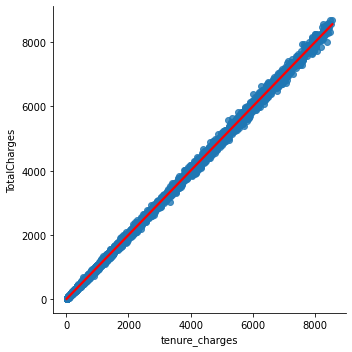

In [48]:
sns.lmplot(x='tenure_charges', y='TotalCharges', data=churn_no_df, line_kws={'color':'red'})

In [49]:
slope, intercept, r_value, p_value, std_err = stats.linregress(churn_no_df.tenure_charges, churn_no_df.TotalCharges)

In [50]:
print('Slope : ', slope)
print('Intercept : ', intercept)
print('r_value : ', r_value)
print('p_value : ', p_value)
print('std_err : ', std_err)
print('r2_value : ', r_value**2)

Slope :  1.0001720821518205
Intercept :  -0.3010983695039613
r_value :  0.9995350350972924
p_value :  0.0
std_err :  0.00042536192429779864
r2_value :  0.9990702863869455


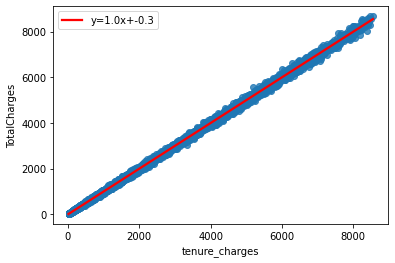

In [51]:
ax = sns.regplot(x='tenure_charges', y='TotalCharges', data=churn_no_df, line_kws={'color':"red", 'label':'y={0:.1f}x+{1:.1f}'.format(slope, intercept)})
ax.legend(loc='best')

In [57]:
def fillna(tenure, monthlycharges):
  if tenure==0:
    totcharges = monthlycharges
  else:
    totcharges = tenure+monthlycharges
    totcharges = intercept+(totcharges*slope)
  return round(totcharges, 2)

In [58]:
churn_df['TotalChargeNew'] = churn_df.apply(lambda x: x['TotalCharges'] if not pd.isna(x['TotalCharges']) else fillna(x['tenure'], x['MonthlyCharges']), axis=1)

In [59]:
churn_df[churn_df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalChargeNew
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,136.92
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,81.86
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,137.22
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,162.53
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,37.51


In [63]:
# check how the imputation is good compared to actual dataset
churn_actual_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet/churn_data_actual.csv')


In [64]:
churn_merge = pd.merge(churn_df, churn_actual_df)

In [65]:
churn_merge[churn_merge.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,TotalChargeNew,TotChargesAct
431,7781-HVGMK,Female,0,72,7,Two year,Yes,65.20,NaN,No,136.92,4784.45
488,4472-LVYGI,Female,0,0,5,Two year,Yes,52.55,NaN,No,52.55,
753,3115-CZMZD,Male,0,0,7,Two year,No,20.25,NaN,No,20.25,
936,5709-LVOEQ,Female,0,0,7,Two year,No,80.85,NaN,No,80.85,
1082,4367-NUYAO,Male,0,0,8,Two year,No,25.75,NaN,No,25.75,
1261,4741-WWJQZ,Female,0,2,4,Month-to-month,Yes,80.15,NaN,No,81.86,194.55
1287,8800-ZKRFW,Female,0,30,8,Month-to-month,Yes,107.50,NaN,No,137.22,3242.5
1340,1371-DWPAZ,Female,0,0,6,Two year,No,56.05,NaN,No,56.05,
1487,5035-PGZXH,Female,0,56,7,One year,Yes,106.80,NaN,No,162.53,5914.4
1846,7369-TRPFD,Male,0,19,7,One year,No,18.80,NaN,No,37.51,279.2
